In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 497.5 MB 26 kB/s 
     |████████████████████████████████| 462 kB 40.8 MB/s 


Epoch 1/10
536/536 [==============================] - 7s 11ms/step - loss: 0.6268 - accuracy: 0.6522 - val_loss: 0.5241 - val_accuracy: 0.7774
Epoch 2/10
536/536 [==============================] - 6s 11ms/step - loss: 0.4980 - accuracy: 0.7929 - val_loss: 0.4851 - val_accuracy: 0.7963
Epoch 3/10
536/536 [==============================] - 4s 7ms/step - loss: 0.4732 - accuracy: 0.7977 - val_loss: 0.4712 - val_accuracy: 0.7970
Epoch 4/10
536/536 [==============================] - 3s 5ms/step - loss: 0.4581 - accuracy: 0.7996 - val_loss: 0.4617 - val_accuracy: 0.7986
Epoch 5/10
536/536 [==============================] - 3s 5ms/step - loss: 0.4469 - accuracy: 0.8037 - val_loss: 0.4539 - val_accuracy: 0.7993
Epoch 6/10
536/536 [==============================] - 3s 5ms/step - loss: 0.4378 - accuracy: 0.8063 - val_loss: 0.4476 - val_accuracy: 0.8027
Epoch 7/10
536/536 [==============================] - 3s 5ms/step - loss: 0.4304 - accuracy: 0.8115 - val_loss: 0.4423 - val_accuracy: 0.8042
Epoc

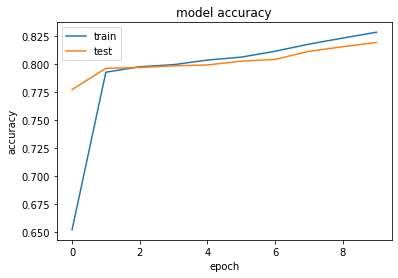

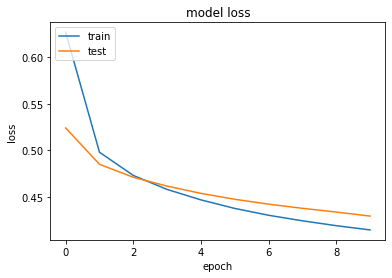

[[1551   44]
 [ 305  100]]
0.8255


In [17]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 11,activation='relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 6, activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 10)

# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

In [18]:
from keras.models import model_from_json

# serialize model to JSON
model_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("model.h5")
print("Saved model to disk")
 
# later...
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [20]:
# evaluate loaded model on test data
loaded_model.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])
y_pred = loaded_model.predict(X_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

[[1551   44]
 [ 305  100]]
0.8255
